In [2]:
library(Seurat)
library(umap)
library(dplyr)
library(Matrix)
library(ggplot2)
library(pheatmap)
library(monocle3)
library(circlize)
library(riverplot)
library(networkD3)
library(ggalluvial)
library(liger)
library(splines)
library(SeuratWrappers)

# human data

In [2]:
human <- ReadH5AD("/datb/share_tmp/bo_data/adata_wb_w34_new.h5ad")

Pulling expression matrices and metadata

Data is unscaled

Creating assay object

Storing X as raw and raw as counts

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
No variable feature expression found in h5ad file

No dimensional reduction information found

Assembling Seurat object

No nearest-neighbor graph

No additional layers found



In [3]:
human_meta = read.csv("/datb/share_tmp/bo_data/Liger_Luyufeng/wholebrainw34_raw_clusters.csv",
                              sep=",",stringsAsFactors=T,header=T,row.names = 1)
w345.meta <- read.csv("/datb/share_tmp/wholebody_w345_metadata.csv")
rownames(w345.meta) <- w345.meta[,1]

In [4]:
human <- AddMetaData(human, metadata = w345.meta)

In [5]:
human <- AddMetaData(human, metadata = human_meta)

In [6]:
head(human@meta.data)

batch week.stage nFeatures_RNA percent.mito nCount_RNA
AAACCTGAGAATGTTG-1-0-0 0     0          3476          0.037098102  14556     
AAACCTGAGCCAGAAC-1-0-0 0     0          3880          0.005319862  22369     
AAACCTGAGGCAGTCA-1-0-0 0     0          4646          0.001197492  31733     
AAACCTGAGGGATGGG-1-0-0 0     0          4258          0.014272256  21230     
AAACCTGAGTGACATA-1-0-0 0     0          3743          0.008267455  16571     
AAACCTGCAACACCTA-1-0-0 0     0          3597          0.006943654  17570     
                       louvain clusters3               
AAACCTGAGAATGTTG-1-0-0  3      H_Somitic_mesoderm      
AAACCTGAGCCAGAAC-1-0-0 12      H_Neural_epithelium     
AAACCTGAGGCAGTCA-1-0-0  3      H_Somitic_mesoderm      
AAACCTGAGGGATGGG-1-0-0  8      H_Lateral_plate_mesoderm
AAACCTGAGTGACATA-1-0-0  0      H_Chondrocyte           
AAACCTGCAACACCTA-1-0-0  0      H_Chondrocyte           
                       clusters                  clusters.new
AAACCTGAGAATGTTG-1-0-0 H_Somitic_mesoderm         3          
AAACCTGAGCCAGAAC-1-0-0 H_Neural_epithelium       12          
AAACCTGAGGCAGTCA-1-0-0 H_Somitic_mesoderm         3          
AAACCTGAGGGATGGG-1-0-0 H_Lateral_plate_mesoderm1  8          
AAACCTGAGTGACATA-1-0-0 H_Chondrocyte1             0          
AAACCTGCAACACCTA-1-0-0 H_Chondrocyte1             0          
                       index                  week_stage n_genes percent_mito
AAACCTGAGAATGTTG-1-0-0 AAACCTGAGAATGTTG-1-0-0 W3-1       3476    0.037098102 
AAACCTGAGCCAGAAC-1-0-0 AAACCTGAGCCAGAAC-1-0-0 W3-1       3880    0.005319862 
AAACCTGAGGCAGTCA-1-0-0 AAACCTGAGGCAGTCA-1-0-0 W3-1       4646    0.001197491 
AAACCTGAGGGATGGG-1-0-0 AAACCTGAGGGATGGG-1-0-0 W3-1       4258    0.014272256 
AAACCTGAGTGACATA-1-0-0 AAACCTGAGTGACATA-1-0-0 W3-1       3743    0.008267455 
AAACCTGCAACACCTA-1-0-0 AAACCTGCAACACCTA-1-0-0 W3-1       3597    0.006943654 
                       n_counts louvain1 louvain_lineage         
AAACCTGAGAATGTTG-1-0-0 14556     3       Presometic_progenitor   
AAACCTGAGCCAGAAC-1-0-0 22369    12       CNS_lineage             
AAACCTGAGGCAGTCA-1-0-0 31733     3       Presometic_progenitor   
AAACCTGAGGGATGGG-1-0-0 21230     8       Cardiac_mesoderm_lineage
AAACCTGAGTGACATA-1-0-0 16571     0       Skeletal_system_lineage 
AAACCTGCAACACCTA-1-0-0 17570     0       Skeletal_system_lineage 
                       Neural_clusters   clusters_new            
AAACCTGAGAATGTTG-1-0-0 other             3Somitic_mesoderm       
AAACCTGAGCCAGAAC-1-0-0 Neural epithelium 12Neural_epithelium     
AAACCTGAGGCAGTCA-1-0-0 other             3Somitic_mesoderm       
AAACCTGAGGGATGGG-1-0-0 other             8Lateral_plate_mesoderm1
AAACCTGAGTGACATA-1-0-0 other             0Chondrocyte1           
AAACCTGCAACACCTA-1-0-0 other             0Chondrocyte1

In [7]:
Idents(human) <- "week_stage"
W3 <- subset(human,idents = "W3-1")
W4 <- subset(human,idents = "W4-1")

# mouse data

In [8]:
mouse <- read.csv('/datb/share_tmp/bo_data/Liger_Luyufeng/Mouse_e85_e95_e105_raw_matrix.csv',
                           sep=",",stringsAsFactors=F,header=T,row.names=1)

In [9]:
mouse <- CreateSeuratObject(counts = mouse, project = "Mouse", min.cells = 0, min.features = 0)

In [10]:
str(mouse)

Formal class 'Seurat' [package "Seurat"] with 12 slots
  ..@ assays      :List of 1
  .. ..$ RNA:Formal class 'Assay' [package "Seurat"] with 8 slots
  .. .. .. ..@ counts       :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:175586607] 3 4 6 8 17 24 27 38 46 49 ...
  .. .. .. .. .. ..@ p       : int [1:54483] 0 3808 7989 10278 13836 17417 21404 24232 27237 30542 ...
  .. .. .. .. .. ..@ Dim     : int [1:2] 18779 54482
  .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. ..$ : chr [1:18779] "XKR4" "RP1" "SOX17" "MRPL15" ...
  .. .. .. .. .. .. ..$ : chr [1:54482] "cell_36865.0.0" "cell_36866.0.0" "cell_36867.0.0" "cell_36869.0.0" ...
  .. .. .. .. .. ..@ x       : num [1:175586607] 4 2 2 2 4 1 2 1 4 50 ...
  .. .. .. .. .. ..@ factors : list()
  .. .. .. ..@ data         :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:175586607] 3 4 6 8 17 24 27 38 46 49 ...
  .. .. .. .. .. ..@ p    

In [11]:
mouse_meta1 = read.csv("/datb/share_tmp/bo_data/Liger_Luyufeng/Mouse_e85_e95_e105_raw_clusters.csv",
                               sep=",",stringsAsFactors=T,header=T,row.names = 1)

In [12]:
mouse_meta2 = read.csv("/datb/share_tmp/bo_data/Mouse_e85_e95_e15_louvain_clusters1_clusters2.csv",
                              sep=",",stringsAsFactors=T,header=T,row.names = 1)

In [13]:
head(mouse_meta1)

Day barcode        batch celltype                     cluster
cell_36865-0-0 E85 AAACATACCACTGA 0     Neural crest                 10     
cell_36866-0-0 E85 AAACATTGCAACTG 0     Allantois                    13     
cell_36867-0-0 E85 AAACATTGGACGAG 0     Erythroid3                   18     
cell_36869-0-0 E85 AAACCGTGGCTAAC 0     Forebrain/Midbrain/Hindbrain 10     
cell_36870-0-0 E85 AAACCGTGTATCTC 0     Somitic mesoderm             13     
cell_36871-0-0 E85 AAACGCACCCAACA 0     Gut                           9     
               cluster.stage cluster.sub cluster.theiler colour doub.density ⋯
cell_36865-0-0  3            8           19              C3C388 0.42580421   ⋯
cell_36866-0-0 11            7            8              532C8A 0.25402500   ⋯
cell_36867-0-0 19            4           17              EF4E22 0.07083671   ⋯
cell_36869-0-0 12            7            6              647a4f 0.48659349   ⋯
cell_36870-0-0  9            5           18              005579 0.31418045   ⋯
cell_36871-0-0 16            8            4              EF5A9D 0.22036367   ⋯
               percent_mito sample sequencing.batch stage stripped theiler
cell_36865-0-0 0.014362657  17     2                E8.5  False    TS12   
cell_36866-0-0 0.009004557  17     2                E8.5  False    TS12   
cell_36867-0-0 0.019606179  17     2                E8.5  False    TS12   
cell_36869-0-0 0.005610273  17     2                E8.5  False    TS12   
cell_36870-0-0 0.008796232  17     2                E8.5  False    TS12   
cell_36871-0-0 0.013503909  17     2                E8.5  False    TS12   
               umapX      umapY      louvain clusters1               
cell_36865-0-0  1.2261451  -7.987035 18      M_Neural_crest          
cell_36866-0-0 -6.2947984   9.852460 14      M_Lateral_plate_mesoderm
cell_36867-0-0 10.3565961   6.400839  3      M_Blood                 
cell_36869-0-0  0.9109553  -5.479232 15      M_Radial_glia2          
cell_36870-0-0  1.5489777   1.385426 17      M_NMP                   
cell_36871-0-0 -5.9116590 -10.271350  2      M_Epithelium

In [14]:
head(mouse_meta2)

Day louvain clusters1                clusters2                
cell_36865-0-0 E85 18      M_Neural_crest           M_Neural_crest           
cell_36866-0-0 E85 14      M_Lateral_plate_mesoderm M_Lateral_plate_mesoderm3
cell_36867-0-0 E85  3      M_Blood                  M_Blood1                 
cell_36869-0-0 E85 15      M_Radial_glia2           M_Radial_glia2           
cell_36870-0-0 E85 17      M_NMP                    M_NMP                    
cell_36871-0-0 E85  2      M_Epithelium             M_Epithelium

In [15]:
rownames(mouse_meta1) <- make.names(rownames(mouse_meta1),unique = T)
rownames(mouse_meta2) <- make.names(rownames(mouse_meta2),unique = T)

In [16]:
all(rownames(mouse_meta1)==colnames(mouse))
all(rownames(mouse_meta2)==colnames(mouse))

[1] TRUE

[1] TRUE

In [17]:
mouse <- AddMetaData(mouse, metadata = mouse_meta1)
mouse <- AddMetaData(mouse, metadata = mouse_meta2)

In [18]:
head(mouse@meta.data)

orig.ident nCount_RNA nFeature_RNA Day barcode        batch
cell_36865.0.0 Mouse      18381      3808         E85 AAACATACCACTGA 0    
cell_36866.0.0 Mouse      18213      4181         E85 AAACATTGCAACTG 0    
cell_36867.0.0 Mouse      11782      2289         E85 AAACATTGGACGAG 0    
cell_36869.0.0 Mouse      16042      3558         E85 AAACCGTGGCTAAC 0    
cell_36870.0.0 Mouse      14438      3581         E85 AAACCGTGTATCTC 0    
cell_36871.0.0 Mouse      18291      3987         E85 AAACGCACCCAACA 0    
               celltype                     cluster cluster.stage cluster.sub ⋯
cell_36865.0.0 Neural crest                 10       3            8           ⋯
cell_36866.0.0 Allantois                    13      11            7           ⋯
cell_36867.0.0 Erythroid3                   18      19            4           ⋯
cell_36869.0.0 Forebrain/Midbrain/Hindbrain 10      12            7           ⋯
cell_36870.0.0 Somitic mesoderm             13       9            5           ⋯
cell_36871.0.0 Gut                           9      16            8           ⋯
               sample sequencing.batch stage stripped theiler umapX     
cell_36865.0.0 17     2                E8.5  False    TS12     1.2261451
cell_36866.0.0 17     2                E8.5  False    TS12    -6.2947984
cell_36867.0.0 17     2                E8.5  False    TS12    10.3565961
cell_36869.0.0 17     2                E8.5  False    TS12     0.9109553
cell_36870.0.0 17     2                E8.5  False    TS12     1.5489777
cell_36871.0.0 17     2                E8.5  False    TS12    -5.9116590
               umapY      louvain clusters1               
cell_36865.0.0  -7.987035 18      M_Neural_crest          
cell_36866.0.0   9.852460 14      M_Lateral_plate_mesoderm
cell_36867.0.0   6.400839  3      M_Blood                 
cell_36869.0.0  -5.479232 15      M_Radial_glia2          
cell_36870.0.0   1.385426 17      M_NMP                   
cell_36871.0.0 -10.271350  2      M_Epithelium            
               clusters2                
cell_36865.0.0 M_Neural_crest           
cell_36866.0.0 M_Lateral_plate_mesoderm3
cell_36867.0.0 M_Blood1                 
cell_36869.0.0 M_Radial_glia2           
cell_36870.0.0 M_NMP                    
cell_36871.0.0 M_Epithelium

In [19]:
mouse@meta.data$louvain_clusters <- paste0(mouse@meta.data$louvain,"",mouse@meta.data$clusters2)

In [20]:
Idents(mouse) <- "Day"
E85 <- subset(mouse,idents = "E85")
E95 <- subset(mouse,idents = "E95")
E105 <- subset(mouse,idents = "E105")

# CCA analysis

In [21]:
W3@meta.data$tech <- "w3"
W4@meta.data$tech <- "w4"
E85@meta.data$tech <- "E85"
E95@meta.data$tech <- "E95"
E105@meta.data$tech <- "E105"

In [22]:
obj <- merge(x=W3,y=c(W4,E85,E95,E105))

In [23]:
str(obj)

Formal class 'Seurat' [package "Seurat"] with 12 slots
  ..@ assays      :List of 1
  .. ..$ RNA:Formal class 'Assay' [package "Seurat"] with 8 slots
  .. .. .. ..@ counts       :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:324619468] 3 17 22 23 32 40 41 46 49 73 ...
  .. .. .. .. .. ..@ p       : int [1:99835] 0 3476 7356 12002 16260 20003 23600 27641 30565 34737 ...
  .. .. .. .. .. ..@ Dim     : int [1:2] 30757 99834
  .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. ..$ : chr [1:30757] "RP11-34P13.7" "RP11-34P13.8" "AL627309.1" "AP006222.2" ...
  .. .. .. .. .. .. ..$ : chr [1:99834] "AAACCTGAGAATGTTG-1-0-0" "AAACCTGAGCCAGAAC-1-0-0" "AAACCTGAGGCAGTCA-1-0-0" "AAACCTGAGGGATGGG-1-0-0" ...
  .. .. .. .. .. ..@ x       : num [1:324619468] 1 1 2 1 2 2 1 2 7 2 ...
  .. .. .. .. .. ..@ factors : list()
  .. .. .. ..@ data         :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:3246194

In [24]:
ch.list <- SplitObject(obj,split.by='tech')
ch.list

$w3
An object of class Seurat 
30757 features across 12367 samples within 1 assay 
Active assay: RNA (30757 features, 0 variable features)

$w4
An object of class Seurat 
30757 features across 32985 samples within 1 assay 
Active assay: RNA (30757 features, 0 variable features)

$E85
An object of class Seurat 
30757 features across 16900 samples within 1 assay 
Active assay: RNA (30757 features, 0 variable features)

$E95
An object of class Seurat 
30757 features across 20301 samples within 1 assay 
Active assay: RNA (30757 features, 0 variable features)

$E105
An object of class Seurat 
30757 features across 17281 samples within 1 assay 
Active assay: RNA (30757 features, 0 variable features)


In [25]:
for (i in 1:length(ch.list)) {
  ch.list[[i]] <- NormalizeData(ch.list[[i]], verbose = FALSE)
  ch.list[[i]] <- FindVariableFeatures(ch.list[[i]], selection.method = "vst", 
                                            nfeatures = 2000, verbose = FALSE)
}
ch.anchors <- FindIntegrationAnchors(object.list = ch.list, dims = 1:30)
ch.integrated <- IntegrateData(anchorset = ch.anchors, dims = 1:30)
DefaultAssay(ch.integrated) <- "integrated"

Computing 2000 integration features

Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 27019 anchors

Filtering anchors

	Retained 7121 anchors

Extracting within-dataset neighbors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 18038 anchors

Filtering anchors

	Retained 6322 anchors

Extracting within-dataset neighbors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 25081 anchors

Filtering anchors

	Retained 7388 anchors

Extracting within-dataset neighbors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 21967 anchors

Filtering anchors

	Retained 3343 anchors

Extracting within-dataset neighbors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 33331 anchors

Filtering anchors

	Retained 15730 anchors

Extracting within-dataset neighbors

Running CCA

Merging objects

Fin

In [26]:
ch.integrated <- ScaleData(ch.integrated, verbose = FALSE)
ch.integrated <- RunPCA(ch.integrated, npcs = 30, verbose = FALSE)

In [27]:
ch.integrated@meta.data$species <- ch.integrated@meta.data$tech
ch.integrated@meta.data$species <- plyr::mapvalues(ch.integrated@meta.data$species, from=c("E105","E85","E95",'w3','w4'), to =c("mouse",'mouse','mouse','human','human'))

In [28]:
ch.integrated <- RunUMAP(ch.integrated, dims = 1:14,min.dist = 0.3,reduction = "pca")

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
23:09:58 UMAP embedding parameters a = 0.9922 b = 1.112

23:09:58 Read 99834 rows and found 14 numeric columns

23:09:58 Using Annoy for neighbor search, n_neighbors = 30

23:09:58 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

23:10:21 Writing NN index file to temp file /tmp/RtmpzZn3i4/file46ca255d59f3b

23:10:21 Searching Annoy index using 1 thread, search_k = 3000

23:11:15 Annoy recall = 100%

23:11:16 Commencing smooth kNN distance calibration using 1 thread

23:11:23 Initializing 

In [29]:
ch.integrated <- FindNeighbors(ch.integrated, reduction = "pca", dims = 1:14)
ch.integrated <- FindClusters(ch.integrated, resolution = 1.0)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 99834
Number of edges: 3487502

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9236
Number of communities: 37
Elapsed time: 40 seconds


Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”


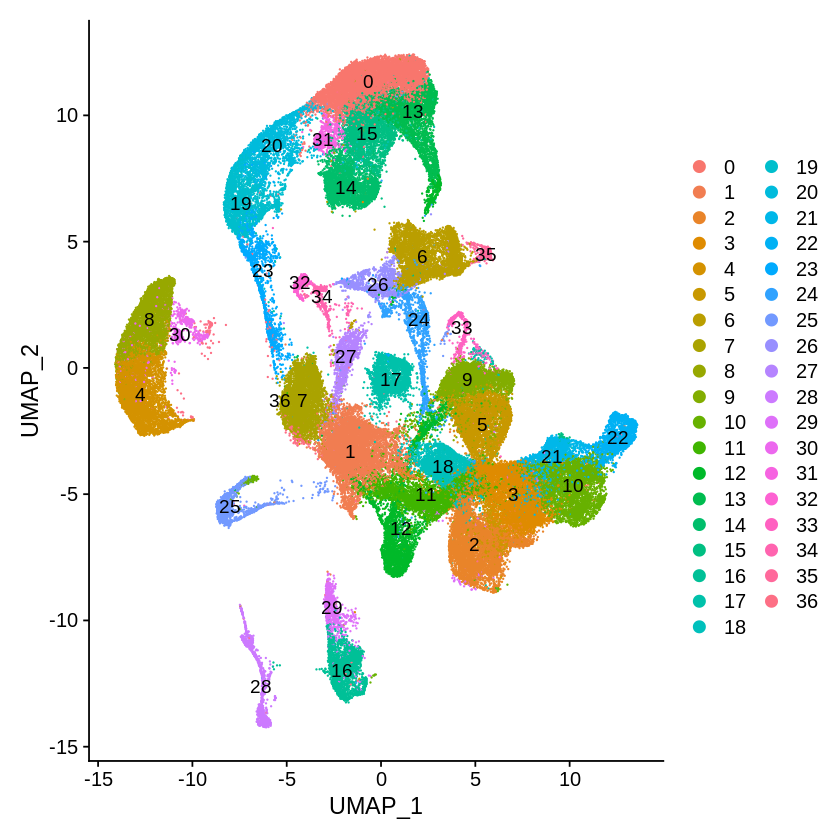

In [30]:
DimPlot(ch.integrated,reduction = "umap",label = T)

In [31]:
ch.integrated@meta.data$clusters_species <- ch.integrated@meta.data$tech
pos <- match(colnames(human),colnames(ch.integrated))
ch.integrated@meta.data$clusters_species[pos] <- as.character(human@meta.data$clusters_new)
pos <- match(colnames(mouse),colnames(ch.integrated))
ch.integrated@meta.data$clusters_species[pos] <- as.character(mouse@meta.data$louvain_clusters)

In [69]:
colors <- c('0Chondrocyte1'= '#FFFF00',
            '1Lateral_plate_mesoderm' = '#1CE6FF',
            '2Mesoderm_prolif1' = '#FF34FF',
            '3Somitic_mesoderm' = '#FF4A46',
            '4Spinal_cord_newborn_neuron1' = '#008941',
            '5Radial_glia1' = '#006FA6',
            '6Head_newborn_neuron' = '#A30059',
            '7Radial_glia2' = '#FFDBE5',
            '8Lateral_plate_mesoderm1' = '#7A4900',
            '9Neural_crest1' = '#0000A6',
            '10Pharyngeal_mesoderm' = '#63FFAC',
            '11Myoblast1' =  '#B79762',
            '12Neural_epithelium' = '#004D43',
            '13Epithelium' = '#8FB0FF',
            '14Spinal_cord_progenitor' = '#997D87',
            '15Myoblast2' = '#5A0007',
            '16Mesoderm_prolif2' = '#809693',
            '17Mesoderm_prolif3' = '#FEFFE6',
            '18Neural_crest2' = '#1B4400',
            '19Neural_crest3' = '#4FC601',
            '20Chondrocyte2' = '#3B5DFF',
            '21Lateral_plate_mesoderm' = '#4A3B53',
            '22Endothelium' = '#FF2F80',
            '23Radial_glia3' = '#61615A',
            '24Lateral_plate_mesoderm2' = '#BA0900',
            '25Spinal_cord_newborn_neuron2' = '#6B7900',
            '26Radial_glia4' = '#00C2A0',
            '27Erythrocyte' = '#FFAA92',
            '28Immune_cell' = '#FF90C9',
            '29Cardiomyocytes' = '#B903AA',
            '30NMP' = '#D16100',
            '31Myocyte' = '#DDEFFF',
            '32Endoderm1' = '#000035',
            '33Spinal_cord_newborn_neuron3' = '#7B4F4B',
            '34Endoderm2' = '#A1C299',  
            '0M_Myoblast' = '#023fa5',
            '1M_Radial_glia4' = '#7d87b9',
            '2M_Epithelium' = '#bec1d4',
            '3M_Blood1' = '#d6bcc0',
            '4M_Radial_glia1' = '#bb7784',
            '5M_Lateral_plate_mesoderm1' = '#8e063b',
            '6M_Neural_progenitor1' = '#4a6fe3',
            '7M_Chondrocyte' = '#8595e1',
            '8M_Neural_epithelium' = '#b5bbe3',
            '9M_Blood2' = '#e6afb9',
            '10M_Blood3' = '#e07b91',
            '11M_Lateral_plate_mesoderm2' = '#d33f6a',
            '12M_Somitic_mesoderm' = '#11c638',
            '13M_Endothelium' = '#8dd593',
            '14M_Lateral_plate_mesoderm3' = '#c6dec7',
            '15M_Radial_glia2' = '#ead3c6',
            '16M_Neural_progenitor2' = '#f0b98d',
            '17M_NMP' = '#ef9708',
            '18M_Neural_crest' = '#0fcfc0',
            '19M_Cardiomyocyte' = '#9cded6',
            '20M_Endoderm1' = '#d5eae7',
            '21M_Lateral_plate_mesoder' = '#f3e1eb',
            '22M_Microglia' = '#f6c4e1', 
            '23M_Blood4' = '#f79cd4',
            '24M_Radial_glia3' = '#7f7f7f', 
            '25M_Endoderm2' = '#c7c7c7',
            '26M_Lateral_plate_mesoderm5' = '#1CE6FF',
            '27M_Endoderm3' = '#336600'
 )

In [70]:
cols <- c('#FFFF00',
          '#1CE6FF',
          '#FF34FF',
          '#FF4A46',
          '#008941',
          '#006FA6',
          '#A30059',
          '#FFDBE5',
          '#7A4900',
          '#0000A6',
          '#63FFAC',
          '#B79762',
          '#004D43',
          '#8FB0FF',
          '#997D87',
          '#5A0007',
          '#809693',
          '#FEFFE6',
          '#1B4400',
          '#4FC601',
          '#3B5DFF',
          '#4A3B53',
          '#FF2F80',
          '#61615A',
          '#BA0900',
          '#6B7900',
          '#00C2A0',
          '#FFAA92',
          '#FF90C9',
          '#B903AA',
          '#D16100',
          '#DDEFFF',
          '#000035',
          '#7B4F4B',
          '#A1C299',
          '#300018',
          '#0AA6D8')

In [71]:
color  <- c('w3'= '#FE8024',
            'w4'= '#FBBF01',
            'E85'= '#0FA326',
            'E95'= '#25B7E8',
            'E105'= '#00009A')

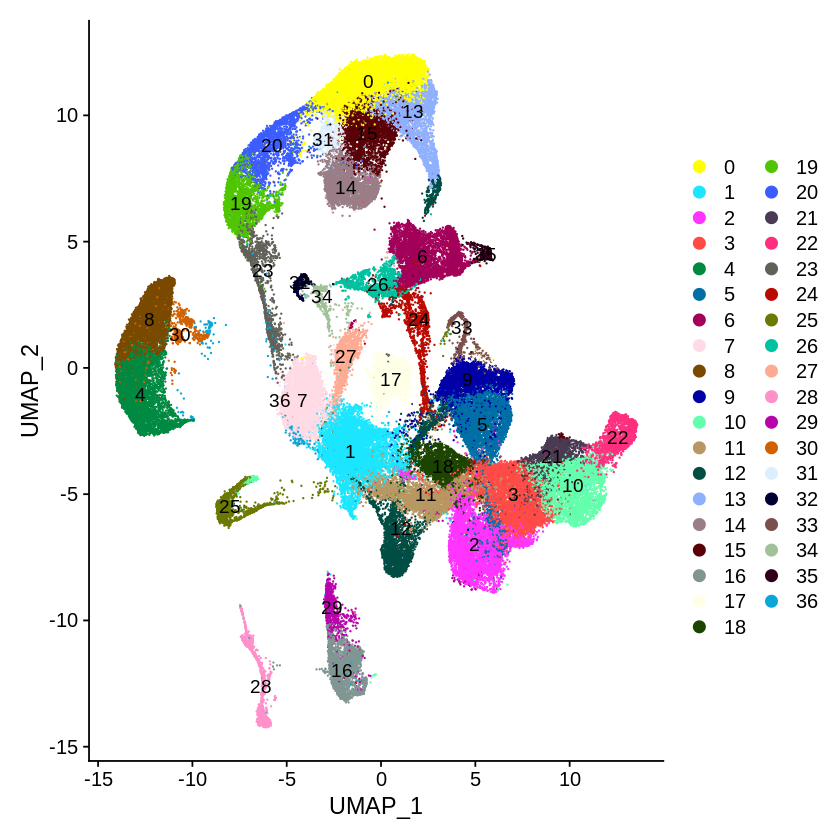

In [72]:
DimPlot(ch.integrated, reduction = "umap", group.by = 'integrated_snn_res.1',label = TRUE,cols = cols)

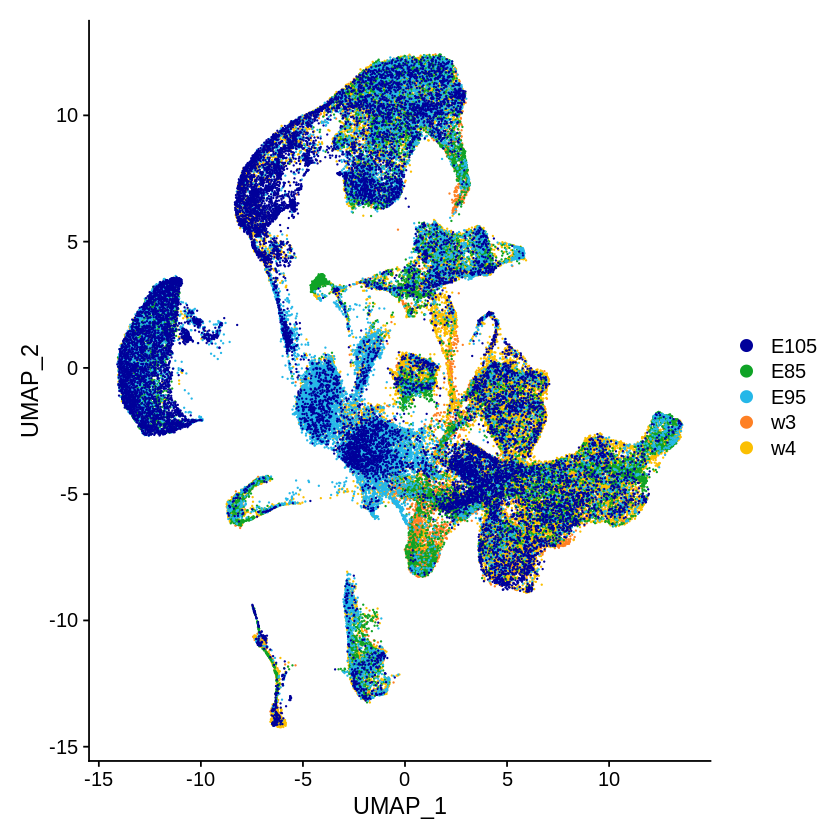

In [74]:
DimPlot(ch.integrated, reduction = "umap",label = F,group.by = 'tech', repel = TRUE,cols=color)

In [80]:
options(repr.plot.width = 15, repr.plot.height = 10)

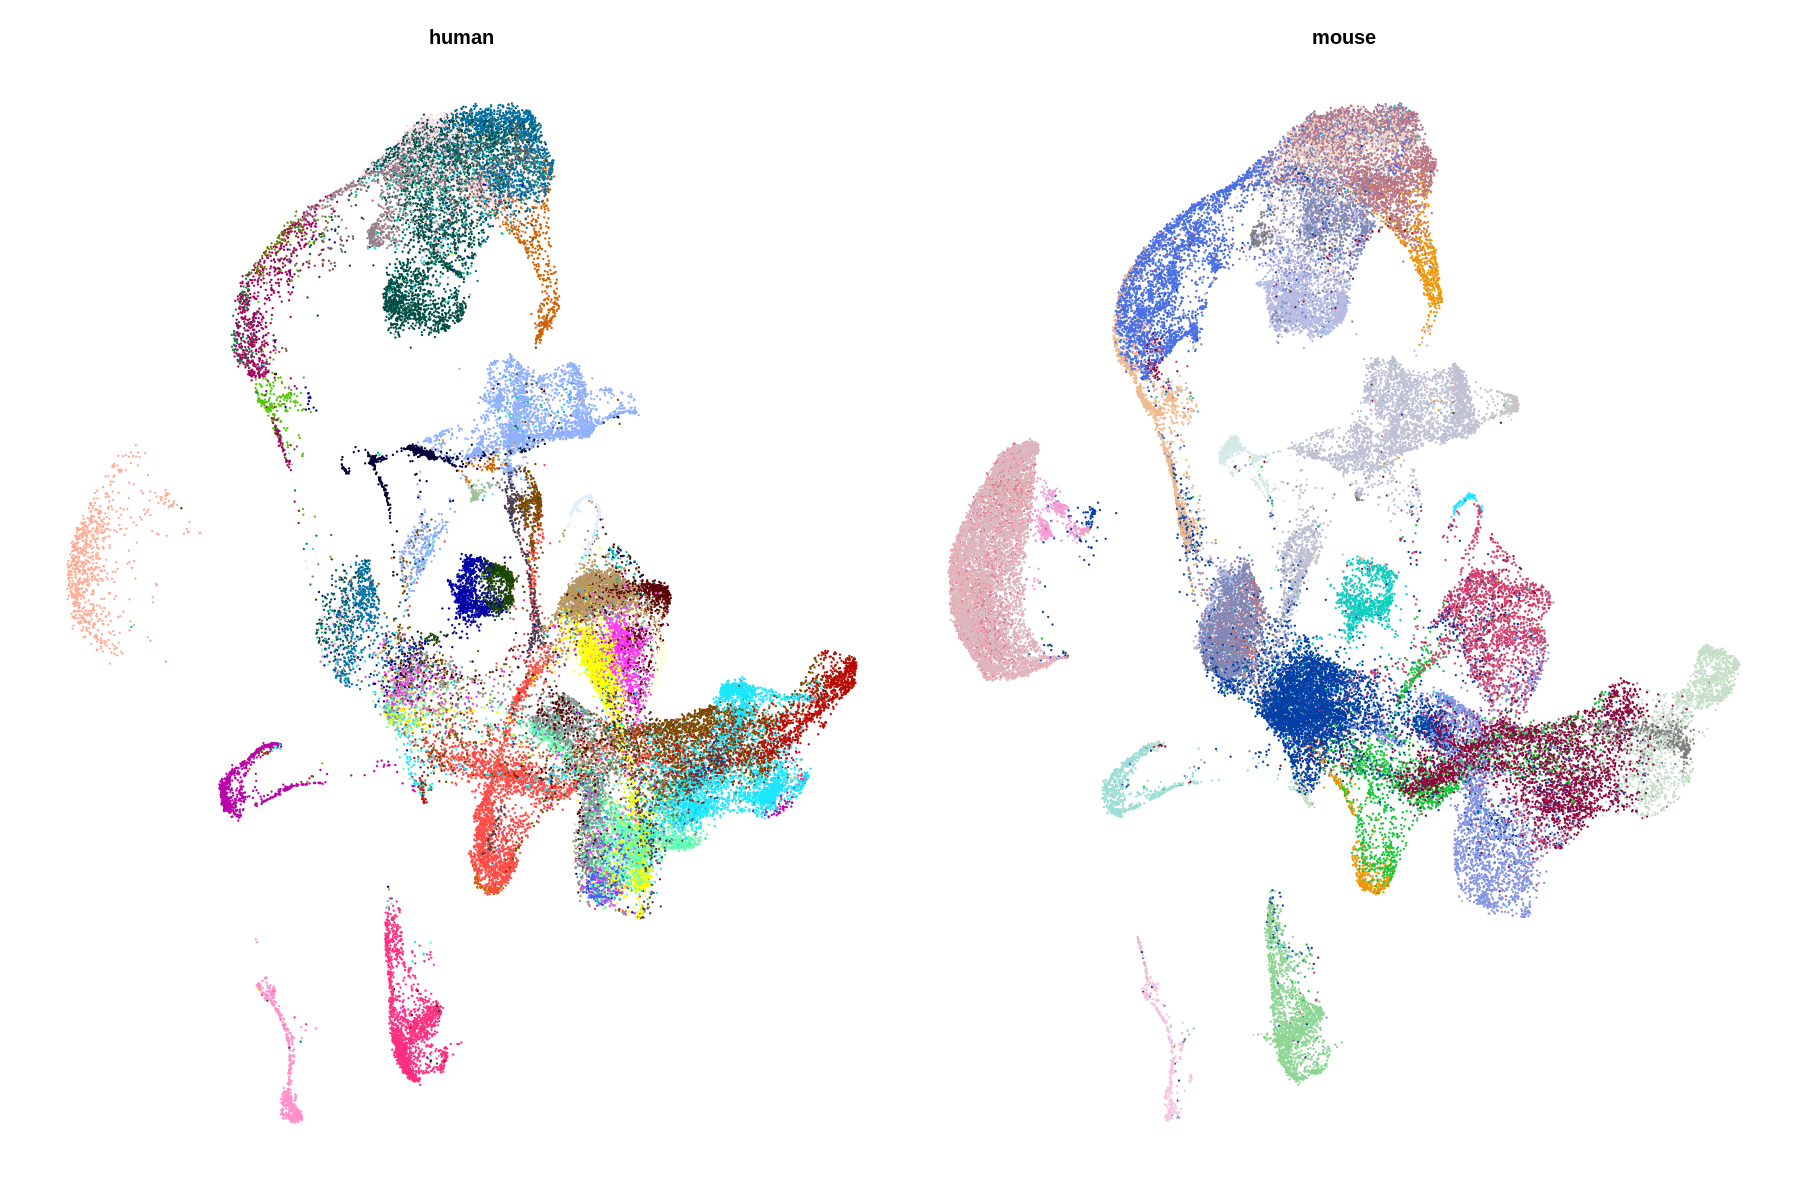

In [81]:
DimPlot(ch.integrated, reduction = "umap",label = F,group.by = 'clusters_species', repel = TRUE,split.by = 'species',cols = colors)+NoLegend()+NoAxes()

In [72]:
tiff("human_mouse_whole_body_lineage_CCA_cluster_UMAP_0729.tiff",width = 600,height = 600)
DimPlot(ch.integrated, reduction = "umap", group.by = 'integrated_snn_res.1',label = TRUE,cols = cols)
dev.off()
tiff("human_mouse_whole_body_lineage_CCA_cluster_no_legend_no_axes_UMAP_0729.tiff",width = 600,height = 600)
DimPlot(ch.integrated, reduction = "umap", label = FALSE, group.by = 'integrated_snn_res.1', cols = cols)+NoLegend()+NoAxes()
dev.off()
tiff("human_mouse_whole_body_lineage_CCA_cluster_UMAP_no_axes_0729.tiff",width = 600,height = 600)
DimPlot(ch.integrated, reduction = "umap", label = FALSE, group.by = 'integrated_snn_res.1', cols = cols)+NoAxes()
dev.off()

png 
  2

png 
  2

png 
  2

In [74]:
tiff("human_mouse_whole_body_lineage_CCA_species_celltype_UMAP_0729.tiff",width = 1200,height = 600)
DimPlot(ch.integrated, reduction = "umap",label = T,group.by = 'clusters_species', repel = TRUE,split.by = 'species',cols = colors)
dev.off()
tiff("human_mouse_whole_body_lineage_CCA_species_celltype_UMAP_no_legend_no_axes_0729.tiff",width = 1200,height = 600)
DimPlot(ch.integrated, reduction = "umap",label = F,group.by = 'clusters_species', repel = TRUE,split.by = 'species',cols = colors)+NoLegend()+NoAxes()
dev.off()
tiff("human_mouse_whole_body_lineage_CCA_species_celltype_UMAP_no_axes_0729.tiff",width = 1200,height = 600)
DimPlot(ch.integrated, reduction = "umap",label = F,group.by = 'clusters_species', repel = TRUE,split.by = 'species',cols = colors)+NoAxes()
dev.off()

png 
  2

png 
  2

png 
  2

In [76]:
tiff("human_mouse_whole_body_lineage_CCA_species_age_UMAP_0729.tiff",width = 600,height = 600)
DimPlot(ch.integrated, reduction = "umap",label = F,group.by = 'tech', repel = TRUE,cols=color)
dev.off()
tiff("human_mouse_whole_body_lineage_CCA_species_age_UMAP_no_legend_no_axes_0729.tiff",width = 600,height = 600)
DimPlot(ch.integrated, reduction = "umap",label = F,group.by = 'tech', repel = TRUE,cols=color)+NoLegend()+NoAxes()
dev.off()
tiff("human_mouse_whole_body_lineage_CCA_species_age_UMAP_no_axes_0729.tiff",width = 600,height = 600)
DimPlot(ch.integrated, reduction = "umap",label = F,group.by = 'tech', repel = TRUE,cols=color)+NoAxes()
dev.off()

png 
  2

png 
  2

png 
  2

# mouse cell type featureplot

In [95]:
Idents(ch.integrated) <- 'species'

In [97]:
mouse_sup <- subset(ch.integrated,idents = "mouse")

In [100]:
mouse_color <- c('0M_Myoblast' = '#023fa5',
                 '1M_Radial_glia4' = '#7d87b9',
                 '2M_Epithelium' = '#bec1d4',
                 '3M_Blood1' = '#d6bcc0',
                 '4M_Radial_glia1' = '#bb7784',
                 '5M_Lateral_plate_mesoderm1' = '#8e063b',
                 '6M_Neural_progenitor1' = '#4a6fe3',
                 '7M_Chondrocyte' = '#8595e1',
                 '8M_Neural_epithelium' = '#b5bbe3',
                 '9M_Blood2' = '#e6afb9',
                 '10M_Blood3' = '#e07b91',
                 '11M_Lateral_plate_mesoderm2' = '#d33f6a',
                 '12M_Somitic_mesoderm' = '#11c638',
                 '13M_Endothelium' = '#8dd593',
                 '14M_Lateral_plate_mesoderm3' = '#c6dec7',
                 '15M_Radial_glia2' = '#ead3c6',
                 '16M_Neural_progenitor2' = '#f0b98d',
                 '17M_NMP' = '#ef9708',
                 '18M_Neural_crest' = '#0fcfc0',
                 '19M_Cardiomyocyte' = '#9cded6',
                 '20M_Endoderm1' = '#d5eae7',
                 '21M_Lateral_plate_mesoder' = '#f3e1eb',
                 '22M_Microglia' = '#f6c4e1', 
                 '23M_Blood4' = '#f79cd4',
                 '24M_Radial_glia3' = '#7f7f7f', 
                 '25M_Endoderm2' = '#c7c7c7',
                 '26M_Lateral_plate_mesoderm5' = '#1CE6FF',
                 '27M_Endoderm3' = '#336600')

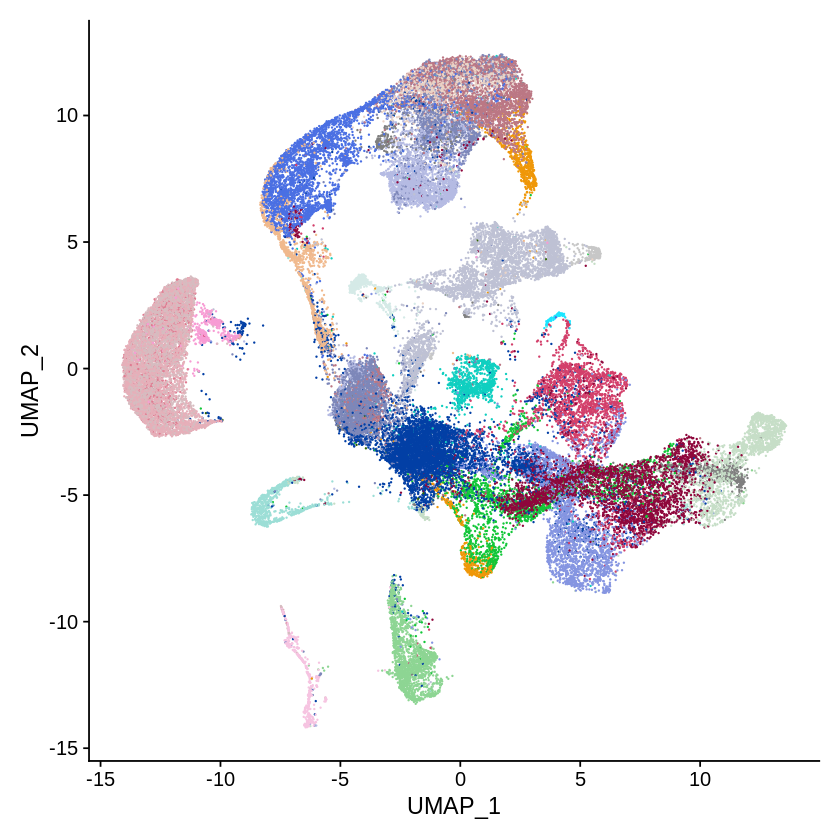

In [102]:
DimPlot(mouse_sup,group.by = "louvain_clusters",cols =  mouse_color,label = F)+NoLegend()

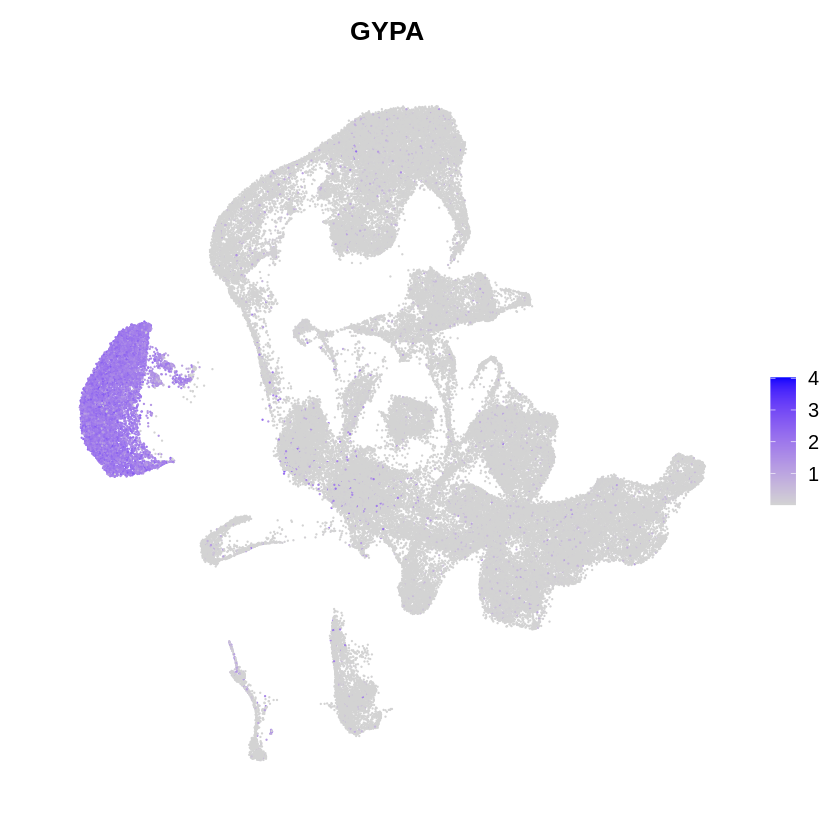

In [141]:
FeaturePlot(ch.integrated,features = 'GYPA',min.cutoff = 'q25')+NoAxes()

In [114]:
tiff('mouse_celltype_LHX2_0729.tiff',width = 700,height = 600)
FeaturePlot(ch.integrated,features = 'LHX2',min.cutoff = 'q25',cols = colorRampPalette(rev(brewer.pal(n = 7, name =
  "RdYlBu")))(3))+NoAxes()
dev.off()

png 
  2

In [113]:
tiff('mouse_celltype_OTX2_0729.tiff',width = 700,height = 600)
FeaturePlot(ch.integrated,features = 'OTX2',min.cutoff = 'q25',cols = colorRampPalette(rev(brewer.pal(n = 7, name =
  "RdYlBu")))(3))+NoAxes()
dev.off()

png 
  2

In [116]:
tiff('mouse_celltype_SOX2_0729.tiff',width = 700,height = 600)
FeaturePlot(ch.integrated,features = 'SOX2',min.cutoff = 'q25',cols = colorRampPalette(rev(brewer.pal(n = 7, name =
  "RdYlBu")))(3))+NoAxes()
dev.off()

png 
  2

In [118]:
tiff('mouse_celltype_PAX6_0729.tiff',width = 700,height = 600)
FeaturePlot(ch.integrated,features = 'PAX6',min.cutoff = 'q25',cols = colorRampPalette(rev(brewer.pal(n = 7, name =
  "RdYlBu")))(3))+NoAxes()
dev.off()

png 
  2

In [120]:
tiff('mouse_celltype_BMP4_0729.tiff',width = 700,height = 600)
FeaturePlot(ch.integrated,features = 'BMP4',min.cutoff = 'q25',cols = colorRampPalette(rev(brewer.pal(n = 7, name =
  "RdYlBu")))(3))+NoAxes()
dev.off()

png 
  2

In [122]:
tiff('mouse_celltype_LUM_0729.tiff',width = 700,height = 600)
FeaturePlot(ch.integrated,features = 'LUM',min.cutoff = 'q25',cols = colorRampPalette(rev(brewer.pal(n = 7, name =
  "RdYlBu")))(3))+NoAxes()
dev.off()

png 
  2

In [124]:
tiff('mouse_celltype_CDH5_0729.tiff',width = 700,height = 600)
FeaturePlot(ch.integrated,features = 'CDH5',min.cutoff = 'q25',cols = colorRampPalette(rev(brewer.pal(n = 7, name =
  "RdYlBu")))(3))+NoAxes()
dev.off()

png 
  2

In [126]:
tiff('mouse_celltype_EPCAM_0729.tiff',width = 700,height = 600)
FeaturePlot(ch.integrated,features = 'EPCAM',min.cutoff = 'q25',cols = colorRampPalette(rev(brewer.pal(n = 7, name =
  "RdYlBu")))(3))+NoAxes()
dev.off()

png 
  2

In [128]:
tiff('mouse_celltype_ELAVL3_0729.tiff',width = 700,height = 600)
FeaturePlot(ch.integrated,features = 'ELAVL3',min.cutoff = 'q25',cols = colorRampPalette(rev(brewer.pal(n = 7, name =
  "RdYlBu")))(3))+NoAxes()
dev.off()

png 
  2

In [130]:
tiff('mouse_celltype_DCX_0729.tiff',width = 700,height = 600)
FeaturePlot(ch.integrated,features = 'DCX',min.cutoff = 'q25',cols = colorRampPalette(rev(brewer.pal(n = 7, name =
  "RdYlBu")))(3))+NoAxes()
dev.off()

png 
  2

In [132]:
tiff('mouse_celltype_HES7_0729.tiff',width = 700,height = 600)
FeaturePlot(ch.integrated,features = 'HES7',min.cutoff = 'q25',cols = colorRampPalette(rev(brewer.pal(n = 7, name =
  "RdYlBu")))(3))+NoAxes()
dev.off()

png 
  2

In [134]:
tiff('mouse_celltype_SOX10_0729.tiff',width = 700,height = 600)
FeaturePlot(ch.integrated,features = 'SOX10',min.cutoff = 'q25',cols = colorRampPalette(rev(brewer.pal(n = 7, name =
  "RdYlBu")))(3))+NoAxes()
dev.off()

png 
  2

In [136]:
tiff('mouse_celltype_TWIST1_0729.tiff',width = 700,height = 600)
FeaturePlot(ch.integrated,features = 'TWIST1',min.cutoff = 'q25',cols = colorRampPalette(rev(brewer.pal(n = 7, name =
  "RdYlBu")))(3))+NoAxes()
dev.off()

png 
  2

In [138]:
tiff('mouse_celltype_MEOX1_0729.tiff',width = 700,height = 600)
FeaturePlot(ch.integrated,features = 'MEOX1',min.cutoff = 'q25',cols = colorRampPalette(rev(brewer.pal(n = 7, name =
  "RdYlBu")))(3))+NoAxes()
dev.off()

png 
  2

In [140]:
tiff('mouse_celltype_C1QC_0729.tiff',width = 700,height = 600)
FeaturePlot(ch.integrated,features = 'C1QC',min.cutoff = 'q25',cols = colorRampPalette(rev(brewer.pal(n = 7, name =
  "RdYlBu")))(3))+NoAxes()
dev.off()

png 
  2

In [142]:
tiff('mouse_celltype_GYPA_0729.tiff',width = 700,height = 600)
FeaturePlot(ch.integrated,features = 'GYPA',min.cutoff = 'q25',cols = colorRampPalette(rev(brewer.pal(n = 7, name =
  "RdYlBu")))(3))+NoAxes()
dev.off()

png 
  2

# river plot

In [3]:
ch.integrated <- readRDS('/datb/home/wanglab03/whole_brain/CCA_test/human_mouse_whole_body_ch_integgrated_20200806.rds')

In [17]:
Idents(ch.integrated)<-'species'
table(Idents(ch.integrated))


human mouse 
45352 54482 

In [18]:
pos_h <- grep('^human$',ch.integrated@meta.data$species)
pos_m <- grep('^mouse$',ch.integrated@meta.data$species)
length(pos_h)
length(pos_m)

[1] 45352

[1] 54482

In [19]:
cluster1 <- as.factor(ch.integrated@meta.data$clusters_new[pos_h])
cluster2 <- as.factor(ch.integrated@meta.data$louvain_clusters[pos_m])
head(colnames(ch.integrated@assays$RNA@data)[pos_h])
names(cluster1)<-colnames(ch.integrated@assays$RNA@data)[pos_h]
names(cluster2)<-colnames(ch.integrated@assays$RNA@data)[pos_m]
cluster1 <- droplevels(cluster1)
cluster2 <- droplevels(cluster2)
#colnames(ch.integrated@meta.data)

[1] "AAACCTGAGAATGTTG-1-0-0" "AAACCTGAGCCAGAAC-1-0-0" "AAACCTGAGGCAGTCA-1-0-0"
[4] "AAACCTGAGGGATGGG-1-0-0" "AAACCTGAGTGACATA-1-0-0" "AAACCTGCAACACCTA-1-0-0"

In [20]:
cluster1 <- factor(cluster1,levels = c('3Somitic_mesoderm','30NMP','34Endoderm2','32Endoderm1','22Endothelium','13Epithelium','28Immune_cell','27Erythrocyte','29Cardiomyocytes','24Lateral_plate_mesoderm2','1Lateral_plate_mesoderm','8Lateral_plate_mesoderm1','21Lateral_plate_mesoderm','31Myocyte','10Pharyngeal_mesoderm','11Myoblast1','15Myoblast2','0Chondrocyte1','20Chondrocyte2','17Mesoderm_prolif3','16Mesoderm_prolif2','2Mesoderm_prolif1','19Neural_crest3','18Neural_crest2','9Neural_crest1','6Head_newborn_neuron','33Spinal_cord_newborn_neuron3','25Spinal_cord_newborn_neuron2','4Spinal_cord_newborn_neuron1','14Spinal_cord_progenitor','26Radial_glia4','23Radial_glia3','7Radial_glia2','5Radial_glia1','12Neural_epithelium'))
cluster2 <- factor(cluster2,levels = c('17M_NMP','27M_Endoderm3','25M_Endoderm2','20M_Endoderm1','13M_Endothelium','2M_Epithelium','22M_Microglia','23M_Blood4','10M_Blood3','9M_Blood2','3M_Blood1','19M_Cardiomyocyte','12M_Somitic_mesoderm','26M_Lateral_plate_mesoderm5','21M_Lateral_plate_mesoderm4','14M_Lateral_plate_mesoderm3','11M_Lateral_plate_mesoderm2','5M_Lateral_plate_mesoderm1','0M_Myoblast','7M_Chondrocyte','18M_Neural_crest','16M_Neural_progenitor2','6M_Neural_progenitor1','1M_Radial_glia4','24M_Radial_glia3','15M_Radial_glia2','4M_Radial_glia1','8M_Neural_epithelium'))

In [21]:
cluster_consensus <- as.factor(ch.integrated@meta.data$integrated_snn_res.1)
names(cluster_consensus)<- colnames(ch.integrated@assays$RNA@data)
cluster_consensus <- droplevels(cluster_consensus)
head(cluster_consensus)
head(cluster1)
head(cluster2)

AAACCTGAGAATGTTG-1-0-0 AAACCTGAGCCAGAAC-1-0-0 AAACCTGAGGCAGTCA-1-0-0 
                    11                      0                     11 
AAACCTGAGGGATGGG-1-0-0 AAACCTGAGTGACATA-1-0-0 AAACCTGCAACACCTA-1-0-0 
                     3                      5                      5 
37 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... 36

AAACCTGAGAATGTTG-1-0-0   AAACCTGAGCCAGAAC-1-0-0   AAACCTGAGGCAGTCA-1-0-0 
       3Somitic_mesoderm      12Neural_epithelium        3Somitic_mesoderm 
  AAACCTGAGGGATGGG-1-0-0   AAACCTGAGTGACATA-1-0-0   AAACCTGCAACACCTA-1-0-0 
8Lateral_plate_mesoderm1            0Chondrocyte1            0Chondrocyte1 
35 Levels: 3Somitic_mesoderm 30NMP 34Endoderm2 32Endoderm1 ... 12Neural_epithelium

cell_36865.0.0              cell_36866.0.0 
           18M_Neural_crest 14M_Lateral_plate_mesoderm3 
             cell_36867.0.0              cell_36869.0.0 
                  3M_Blood1            15M_Radial_glia2 
             cell_36870.0.0              cell_36871.0.0 
                    17M_NMP               2M_Epithelium 
28 Levels: 17M_NMP 27M_Endoderm3 25M_Endoderm2 ... 8M_Neural_epithelium

In [55]:
#tab.1 <- table(cluster1, cluster_consensus[names(cluster1)])
#tab.1 <- sweep(tab.1, 1, rowSums(tab.1), "/")
#tab.2 <- table(cluster2, cluster_consensus[names(cluster2)])
#tab.2 <- sweep(tab.2, 1, rowSums(tab.2), "/")
#whichmax.1 <- apply(tab.1, 1, which.max)
#whichmax.2 <- apply(tab.2, 1, which.max)
#ord.1 <- order(whichmax.1)
#ord.2 <- order(whichmax.2)
#cluster1 <- factor(cluster1, levels = levels(cluster1)[ord.1])
#cluster2 <- factor(cluster2, levels = levels(cluster2)[ord.2])

In [22]:
  cluster1 <- cluster1[!is.na(cluster1)]
  cluster2 <- cluster2[!is.na(cluster2)]
  nodes1 <- levels(cluster1)[table(cluster1) > 0]
  nodes2 <- levels(cluster2)[table(cluster2) > 0]
  nodes_middle <- levels(cluster_consensus)[table(cluster_consensus) > 0]
  node_Xs <- c(
    rep(1, length(nodes1)), rep(2, length(nodes_middle)),
    rep(3, length(nodes2)))

min.frac=0.03
min.cells=8

 edge_list <- list()
  for (i in 1:length(nodes1)) {
    temp <- list()
    i_cells <- names(cluster1)[cluster1 == nodes1[i]]
    for (j in 1:length(nodes_middle)) {
      if (length(which(cluster_consensus[i_cells] == nodes_middle[j])) / length(i_cells) > min.frac &
          length(which(cluster_consensus[i_cells] == nodes_middle[j])) > min.cells) {
        temp[[nodes_middle[j]]] <- sum(cluster_consensus[i_cells] ==
                                         nodes_middle[j]) / length(cluster1)
      }
    }
    edge_list[[nodes1[i]]] <- temp
  }

temp

head(nodes_middle)

cluster1

nodes1

$`0`
[1] 0.02630534

$`7`
[1] 0.003572059

$`14`
[1] 0.02048421

$`15`
[1] 0.01552302

[1] "0" "1" "2" "3" "4" "5"

AAACCTGAGAATGTTG-1-0-0        AAACCTGAGCCAGAAC-1-0-0 
            3Somitic_mesoderm           12Neural_epithelium 
       AAACCTGAGGCAGTCA-1-0-0        AAACCTGAGGGATGGG-1-0-0 
            3Somitic_mesoderm      8Lateral_plate_mesoderm1 
       AAACCTGAGTGACATA-1-0-0        AAACCTGCAACACCTA-1-0-0 
                0Chondrocyte1                 0Chondrocyte1 
       AAACCTGCACAGGTTT-1-0-0        AAACCTGCACCGATAT-1-0-0 
          12Neural_epithelium                         30NMP 
       AAACCTGGTAAGGGCT-1-0-0        AAACCTGGTGGTCCGT-1-0-0 
            3Somitic_mesoderm                         30NMP 
       AAACCTGGTTATCGGT-1-0-0        AAACCTGTCAACACGT-1-0-0 
     8Lateral_plate_mesoderm1             3Somitic_mesoderm 
       AAACCTGTCACTTACT-1-0-0        AAACCTGTCATGTCCC-1-0-0 
          12Neural_epithelium             3Somitic_mesoderm 
       AAACCTGTCGTTTGCC-1-0-0        AAACCTGTCTGCTGTC-1-0-0 
               9Neural_crest1             3Somitic_mesoderm 
       AAACCTGTCTGGTGTA-1-0-0        AAACGGGAGCGTTGCC-1-0-0 
            3Somitic_mesoderm             3Somitic_mesoderm 
       AAACGGGCAGCGTTCG-1-0-0        AAACGGGCAGCTCCGA-1-0-0 
            3Somitic_mesoderm                 22Endothelium 
       AAACGGGGTATATGGA-1-0-0        AAACGGGGTCAACATC-1-0-0 
                 13Epithelium                         30NMP 
       AAACGGGTCCTATGTT-1-0-0        AAACGGGTCGGAGGTA-1-0-0 
            3Somitic_mesoderm                   15Myoblast2 
       AAACGGGTCTGCTGTC-1-0-0        AAAGATGAGATCCCAT-1-0-0 
          12Neural_epithelium                   15Myoblast2 
       AAAGATGAGATGGGTC-1-0-0        AAAGATGAGCTACCGC-1-0-0 
    24Lateral_plate_mesoderm2             3Somitic_mesoderm 
       AAAGATGAGTATTGGA-1-0-0        AAAGATGCAATAACGA-1-0-0 
     8Lateral_plate_mesoderm1                         30NMP 
       AAAGATGCACACAGAG-1-0-0        AAAGATGGTCACACGC-1-0-0 
        10Pharyngeal_mesoderm           12Neural_epithelium 
       AAAGATGGTGTGACGA-1-0-0        AAAGATGGTGTTTGTG-1-0-0 
                  15Myoblast2             3Somitic_mesoderm 
       AAAGATGTCGGTGTTA-1-0-0        AAAGATGTCGTAGATC-1-0-0 
     8Lateral_plate_mesoderm1             3Somitic_mesoderm 
       AAAGCAAAGACCACGA-1-0-0        AAAGCAAAGGCTCTTA-1-0-0 
            3Somitic_mesoderm                 5Radial_glia1 
       AAAGCAAAGGTGTGGT-1-0-0        AAAGCAAAGTAACCCT-1-0-0 
     8Lateral_plate_mesoderm1      8Lateral_plate_mesoderm1 
       AAAGCAAAGTGGAGAA-1-0-0        AAAGCAACAACCGCCA-1-0-0 
          12Neural_epithelium       1Lateral_plate_mesoderm 
       AAAGCAACAGCGTTCG-1-0-0        AAAGCAACAGTAAGCG-1-0-0 
            3Somitic_mesoderm             3Somitic_mesoderm 
       AAAGCAAGTACCAGTT-1-0-0        AAAGCAAGTACCGCTG-1-0-0 
                        30NMP      8Lateral_plate_mesoderm1 
       AAAGCAATCAAACCGT-1-0-0        AAAGCAATCAACCATG-1-0-0 
           16Mesoderm_prolif2            16Mesoderm_prolif2 
       AAAGCAATCTATCCCG-1-0-0        AAAGCAATCTCAAACG-1-0-0 
            3Somitic_mesoderm           12Neural_epithelium 
       AAAGTAGAGATGCGAC-1-0-0        AAAGTAGAGGGTTTCT-1-0-0 
            3Somitic_mesoderm             3Somitic_mesoderm 
       AAAGTAGAGTCAAGGC-1-0-0        AAAGTAGCAACGCACC-1-0-0 
            3Somitic_mesoderm                   11Myoblast1 
       AAAGTAGCAATCCGAT-1-0-0        AAAGTAGCACCTATCC-1-0-0 
    24Lateral_plate_mesoderm2           12Neural_epithelium 
       AAAGTAGGTAAACACA-1-0-0        AAAGTAGGTACTCTCC-1-0-0 
                        30NMP      8Lateral_plate_mesoderm1 
       AAAGTAGGTATAGGGC-1-0-0        AAAGTAGGTCTGCAAT-1-0-0 
        10Pharyngeal_mesoderm                   11Myoblast1 
       AAAGTAGGTGGTCCGT-1-0-0        AAAGTAGTCAACACAC-1-0-0 
                 13Epithelium      8Lateral_plate_mesoderm1 
       AAAGTAGTCAGCTGGC-1-0-0        AAAGTAGTCCGTAGGC-1-0-0 
                  11Myoblast1         10Pharyngeal_mesoderm 
       AAAGTAGTCGTTACGA-1-0-0        AAAGTAGTCTTGCATT-1-0-0 
            3Somitic_mesoderm             

[1] "3Somitic_mesoderm"             "30NMP"                        
 [3] "34Endoderm2"                   "32Endoderm1"                  
 [5] "22Endothelium"                 "13Epithelium"                 
 [7] "28Immune_cell"                 "27Erythrocyte"                
 [9] "29Cardiomyocytes"              "24Lateral_plate_mesoderm2"    
[11] "1Lateral_plate_mesoderm"       "8Lateral_plate_mesoderm1"     
[13] "21Lateral_plate_mesoderm"      "31Myocyte"                    
[15] "10Pharyngeal_mesoderm"         "11Myoblast1"                  
[17] "15Myoblast2"                   "0Chondrocyte1"                
[19] "20Chondrocyte2"                "17Mesoderm_prolif3"           
[21] "16Mesoderm_prolif2"            "2Mesoderm_prolif1"            
[23] "19Neural_crest3"               "18Neural_crest2"              
[25] "9Neural_crest1"                "6Head_newborn_neuron"         
[27] "33Spinal_cord_newborn_neuron3" "25Spinal_cord_newborn_neuron2"
[29] "4Spinal_cord_newborn_neuron1"  "14Spinal_cord_progenitor"     
[31] "26Radial_glia4"                "23Radial_glia3"               
[33] "7Radial_glia2"                 "5Radial_glia1"                
[35] "12Neural_epithelium"

In [23]:
edge_list <- list()
  for (i in 1:length(nodes1)) {
    temp <- list()
    i_cells <- names(cluster1)[cluster1 == nodes1[i]]
    for (j in 1:length(nodes_middle)) {
      if (length(which(cluster_consensus[i_cells] == nodes_middle[j])) / length(i_cells) > min.frac &
          length(which(cluster_consensus[i_cells] == nodes_middle[j])) > min.cells) {
        temp[[nodes_middle[j]]] <- sum(cluster_consensus[i_cells] ==
                                         nodes_middle[j]) / length(cluster1)
      }
    }
    edge_list[[nodes1[i]]] <- temp
  }
 cluster3 <- cluster_consensus[names(cluster2)]
  for (i in 1:length(nodes_middle)) {
    temp <- list()
    i_cells <- names(cluster3)[cluster3 == nodes_middle[i]]
    for (j in 1:length(nodes2)) {
      j_cells <- names(cluster2)[cluster2 == nodes2[j]]
      if (length(which(cluster_consensus[j_cells] == nodes_middle[i])) / length(j_cells) > min.frac &
          length(which(cluster_consensus[j_cells] == nodes_middle[i])) > min.cells) {
        if (!is.na(sum(cluster2[i_cells] == nodes2[j]))) {
          temp[[nodes2[j]]] <- sum(cluster2[i_cells] ==
                                     nodes2[j]) / length(cluster2)
        }
      }
    }
    edge_list[[nodes_middle[i]]] <- temp
  }

In [24]:
label.cex=1
label.col='black'
lab.srt=0

node_cols <- list()
  ggplotColors <- function(g) {
    d <- 360 / g
    h <- cumsum(c(15, rep(d, g - 1)))
    grDevices::hcl(h = h, c = 100, l = 65)
  }
  pal <- ggplotColors(length(nodes1))
  for (i in 1:length(nodes1)) {
    node_cols[[nodes1[i]]] <- list(col = pal[i], textcex = label.cex,
                                   textcol = label.col, srt = lab.srt)
  }
  pal <- ggplotColors(length(nodes_middle))
  for (i in 1:length(nodes_middle)) {
    node_cols[[nodes_middle[i]]] <- list(col = pal[i], textcex = label.cex,
                                         textcol = label.col, srt = lab.srt)
  }
  pal <- ggplotColors(length(nodes2))
  for (i in 1:length(nodes2)) {
    node_cols[[nodes2[i]]] <- list(col = pal[i], textcex = label.cex,
                                   textcol = label.col, srt = lab.srt)
  }
  # create nodes and riverplot object
  nodes <- list(nodes1, nodes_middle, nodes2)
  node.limit <- max(unlist(lapply(nodes, length)))
  
  node_Ys <- lapply(1:length(nodes), function(i) {
    seq(1, node.limit, by = node.limit / length(nodes[[i]]))
  })
  rp <- makeRiver(c(nodes1, nodes_middle, nodes2), edge_list,
                  node_xpos = node_Xs, node_ypos = unlist(node_Ys), node_styles = node_cols
  )

In [25]:
river.yscale=12.5
river.lty =0
river.node_margin=0.1

--------------
Default style:
-----------
$nodestyle
[1] "regular"

$col
[1] "grey"

$srt
[1] "90"

$lty
[1] 1

$textcol
[1] "black"

$textcex
[1] 1

$edgecol
[1] "gradient"

$edgestyle
[1] "sin"

attr(,"class")
[1] "list"           "riverplotStyle"
--------------
[1] "checking edges"
Updated styles:
$`3Somitic_mesoderm`
$col
[1] "#F8766D"

$textcex
[1] 1

$textcol
[1] "black"

$srt
[1] 0

$nodestyle
[1] "regular"

$lty
[1] 1

$edgecol
[1] "gradient"

$edgestyle
[1] "sin"

attr(,"class")
[1] "list"           "riverplotStyle"

$`30NMP`
$col
[1] "#F17E4F"

$textcex
[1] 1

$textcol
[1] "black"

$srt
[1] 0

$nodestyle
[1] "regular"

$lty
[1] 1

$edgecol
[1] "gradient"

$edgestyle
[1] "sin"

attr(,"class")
[1] "list"           "riverplotStyle"

$`34Endoderm2`
$col
[1] "#E88523"

$textcex
[1] 1

$textcol
[1] "black"

$srt
[1] 0

$nodestyle
[1] "regular"

$lty
[1] 1

$edgecol
[1] "gradient"

$edgestyle
[1] "sin"

attr(,"class")
[1] "list"           "riverplotStyle"

$`32Endoderm1`
$col
[1] "#

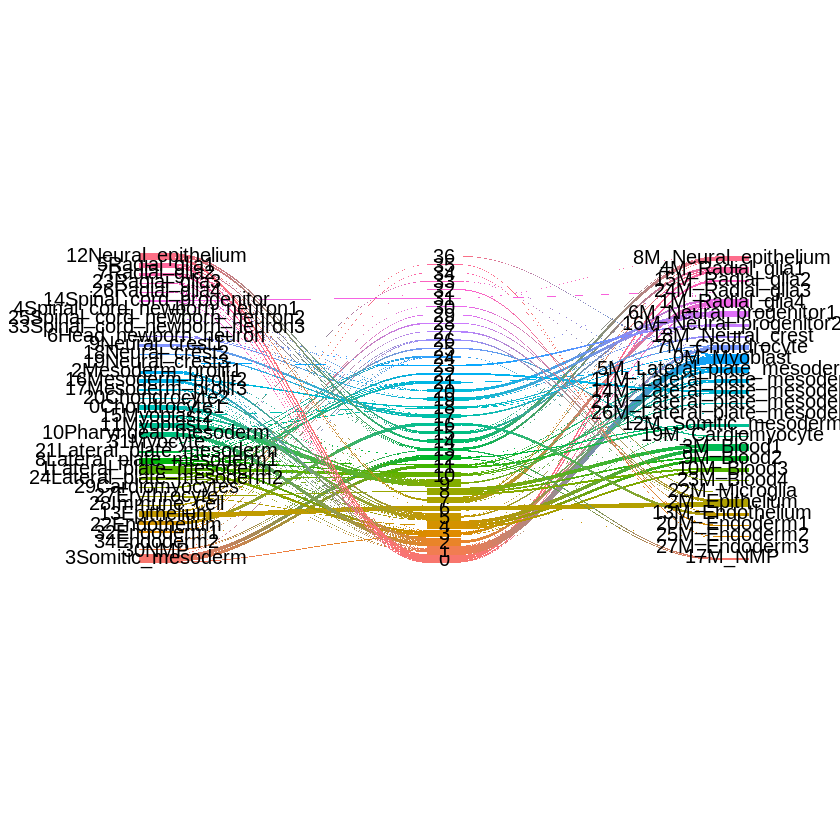

In [26]:
riverplot(rp,lty=river.lty,yscale=river.yscale,node_margin=river.node_margin)

In [27]:
rp$styles$'0Chondrocyte1'$col = '#FFFF00'
rp$styles$'1Lateral_plate_mesoderm'$col = '#1CE6FF'
rp$styles$'2Mesoderm_prolif1'$col = '#FF34FF'
rp$styles$'3Somitic_mesoderm'$col = '#FF4A46'
rp$styles$'4Spinal_cord_newborn_neuron1'$col = '#008941'
rp$styles$'5Radial_glia1'$col = '#006FA6'
rp$styles$'6Head_newborn_neuron'$col = '#A30059'
rp$styles$'7Radial_glia2'$col = '#FFDBE5'
rp$styles$'8Lateral_plate_mesoderm1'$col = '#7A4900'
rp$styles$'9Neural_crest1'$col = '#0000A6'
rp$styles$'10Pharyngeal_mesoderm'$col = '#63FFAC'
rp$styles$'11Myoblast1'$col =  '#B79762'
rp$styles$'12Neural_epithelium'$col = '#004D43'
rp$styles$'13Epithelium'$col = '#8FB0FF'
rp$styles$'14Spinal_cord_progenitor'$col = '#997D87'
rp$styles$'15Myoblast2'$col = '#5A0007'
rp$styles$'16Mesoderm_prolif2'$col = '#809693'
rp$styles$'17Mesoderm_prolif3'$col = '#FEFFE6'
rp$styles$'18Neural_crest2'$col = '#1B4400'
rp$styles$'19Neural_crest3'$col = '#4FC601'
rp$styles$'20Chondrocyte2'$col = '#3B5DFF'
rp$styles$'21Lateral_plate_mesoderm'$col = '#4A3B53'
rp$styles$'22Endothelium'$col = '#FF2F80'
rp$styles$'23Radial_glia3'$col = '#61615A'
rp$styles$'24Lateral_plate_mesoderm2'$col = '#BA0900'
rp$styles$'25Spinal_cord_newborn_neuron2'$col = '#6B7900'
rp$styles$'26Radial_glia4'$col = '#00C2A0'
rp$styles$'27Erythrocyte'$col = '#FFAA92'
rp$styles$'28Immune_cell'$col = '#FF90C9'
rp$styles$'29Cardiomyocytes'$col = '#B903AA'
rp$styles$'30NMP'$col = '#D16100'
rp$styles$'31Myocyte'$col = '#DDEFFF'
rp$styles$'32Endoderm1'$col = '#000035'
rp$styles$'33Spinal_cord_newborn_neuron3'$col = '#7B4F4B'
rp$styles$'34Endoderm2'$col = '#A1C299' 
rp$styles$'0M_Myoblast'$col = '#023fa5'
rp$styles$'1M_Radial_glia4'$col = '#7d87b9'
rp$styles$'2M_Epithelium'$col = '#bec1d4'
rp$styles$'3M_Blood1'$col = '#d6bcc0'
rp$styles$'4M_Radial_glia1'$col = '#bb7784'
rp$styles$'5M_Lateral_plate_mesoderm1'$col = '#8e063b'
rp$styles$'6M_Neural_progenitor1'$col = '#4a6fe3'
rp$styles$'7M_Chondrocyte'$col = '#8595e1'
rp$styles$'8M_Neural_epithelium'$col = '#b5bbe3'
rp$styles$'9M_Blood2'$col = '#e6afb9'
rp$styles$'10M_Blood3'$col = '#e07b91'
rp$styles$'11M_Lateral_plate_mesoderm2'$col = '#d33f6a'
rp$styles$'12M_Somitic_mesoderm'$col = '#11c638'
rp$styles$'13M_Endothelium'$col = '#8dd593'
rp$styles$'14M_Lateral_plate_mesoderm3'$col = '#c6dec7'
rp$styles$'15M_Radial_glia2'$col = '#ead3c6'
rp$styles$'16M_Neural_progenitor2'$col = '#f0b98d'
rp$styles$'17M_NMP'$col = '#ef9708'
rp$styles$'18M_Neural_crest'$col = '#0fcfc0'
rp$styles$'19M_Cardiomyocyte'$col = '#9cded6'
rp$styles$'20M_Endoderm1'$col = '#d5eae7'
rp$styles$'21M_Lateral_plate_mesoderm4'$col = '#f3e1eb'
rp$styles$'22M_Microglia'$col = '#f6c4e1'
rp$styles$'23M_Blood4'$col = '#f79cd4'
rp$styles$'24M_Radial_glia3'$col = '#7f7f7f'
rp$styles$'25M_Endoderm2'$col = '#c7c7c7'
rp$styles$'26M_Lateral_plate_mesoderm5'$col = '#1CE6FF'
rp$styles$'27M_Endoderm3'$col = '#336600'
rp$styles$'0'$col = '#FFFF00'
rp$styles$'1'$col = '#1CE6FF'
rp$styles$'2'$col = '#FF34FF'
rp$styles$'3'$col = '#FF4A46'
rp$styles$'4'$col = '#008941'
rp$styles$'5'$col = '#006FA6'
rp$styles$'6'$col = '#A30059'
rp$styles$'7'$col = '#FFDBE5'
rp$styles$'8'$col = '#7A4900'
rp$styles$'9'$col = '#0000A6'
rp$styles$'10'$col = '#63FFAC'
rp$styles$'11'$col = '#B79762'
rp$styles$'12'$col = '#004D43'
rp$styles$'13'$col = '#8FB0FF'
rp$styles$'14'$col = '#997D87'
rp$styles$'15'$col = '#5A0007'
rp$styles$'16'$col = '#809693'
rp$styles$'17'$col = '#FEFFE6'
rp$styles$'18'$col = '#1B4400'
rp$styles$'19'$col = '#4FC601'
rp$styles$'20'$col = '#3B5DFF'
rp$styles$'21'$col = '#4A3B53'
rp$styles$'22'$col = '#FF2F80'
rp$styles$'23'$col = '#61615A'
rp$styles$'24'$col = '#BA0900'
rp$styles$'25'$col = '#6B7900'
rp$styles$'26'$col = '#00C2A0'
rp$styles$'27'$col = '#FFAA92'
rp$styles$'28'$col = '#FF90C9'
rp$styles$'29'$col = '#B903AA'
rp$styles$'30'$col = '#D16100'
rp$styles$'31'$col = '#DDEFFF'
rp$styles$'32'$col = '#000035'
rp$styles$'33'$col = '#7B4F4B'
rp$styles$'34'$col = '#A1C299'
rp$styles$'35'$col = '#300018'
rp$styles$'36'$col = '#0AA6D8'

In [28]:
river.yscale=17.5
river.lty =0
river.node_margin=0.1

In [29]:
pdf("human_mouse_whole_body_CCA_analysis_riverplot_0811_175.pdf",width = 15,height = 15)
riverplot(rp,lty=river.lty,yscale=river.yscale,node_margin=river.node_margin)
dev.off()

--------------
Default style:
-----------
$nodestyle
[1] "regular"

$col
[1] "grey"

$srt
[1] "90"

$lty
[1] 1

$textcol
[1] "black"

$textcex
[1] 1

$edgecol
[1] "gradient"

$edgestyle
[1] "sin"

attr(,"class")
[1] "list"           "riverplotStyle"
--------------
[1] "checking edges"
Updated styles:
$`3Somitic_mesoderm`
$col
[1] "#FF4A46"

$textcex
[1] 1

$textcol
[1] "black"

$srt
[1] 0

$nodestyle
[1] "regular"

$lty
[1] 1

$edgecol
[1] "gradient"

$edgestyle
[1] "sin"

attr(,"class")
[1] "list"           "riverplotStyle"

$`30NMP`
$col
[1] "#D16100"

$textcex
[1] 1

$textcol
[1] "black"

$srt
[1] 0

$nodestyle
[1] "regular"

$lty
[1] 1

$edgecol
[1] "gradient"

$edgestyle
[1] "sin"

attr(,"class")
[1] "list"           "riverplotStyle"

$`34Endoderm2`
$col
[1] "#A1C299"

$textcex
[1] 1

$textcol
[1] "black"

$srt
[1] 0

$nodestyle
[1] "regular"

$lty
[1] 1

$edgecol
[1] "gradient"

$edgestyle
[1] "sin"

attr(,"class")
[1] "list"           "riverplotStyle"

$`32Endoderm1`
$col
[1] "#

png 
  2

In [82]:
saveRDS(ch.integrated,file = "human_mouse_whole_body_ch_integgrated_20200806.rds")

In [83]:
human_mouse_whole_body_lineage_table <- FetchData(object = ch.integrated,vars = c('UMAP_1','UMAP_2','integrated_snn_res.1','species','clusters_species','tech'))

In [84]:
write.table(human_mouse_whole_body_lineage_table,file = "human_mouse_whole_body_lineage_table.csv",sep = ',')